In [31]:
import camelot
import pandas as pd

I have used the **camelot** open source library. I had to manipulate parameters to ensure perfect extraction of tables in the intended layouts. Most tables can be extracted properly with tuning.using parameters like 'line_scale','shift_text','strip_text' etc

## Code for insertion into database

In [32]:
from pymongo import MongoClient


def part():
    print("------------------------------------------------")


#######################################
curr_counter = 0
curr_collection_name = "collection_name_"
#########################################

try:
    conn = MongoClient()
    print("Connected successfully!!!")
except:
    print("Could not connect to MongoDB")

# database
db = conn.database

Connected successfully!!!


In [33]:
def insert_data(data_obj):
    global curr_collection_name
    global curr_counter
    col_name = curr_collection_name + str(curr_counter)
    collection_obj = db[col_name]
    curr_counter += 1
    collection_obj.insert_many(data_obj)

    part()
    # Printing the data inserted
    cursor = collection_obj.find()
    for record in cursor:
        print(record)


In [34]:
def insert_into_db(tables):
    for j in range(0,tables.n):
        data_dict = tables[j].df.to_dict("records")
        # print(type(data_dict))
        # print(data_dict)
        for i in range(0, len(data_dict)):
            keys_values = data_dict[i].items()
            data_dict[i] = {str(key): value for key, value in keys_values}

        insert_data(data_dict)

# iifl.pdf

In [35]:
tables=camelot.read_pdf("./Rec_Task/iifl.pdf",line_scale=20,strip_text='\n')

In [36]:
# number of tables extracted
print("Total tables extracted:", tables.n)

Total tables extracted: 2


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


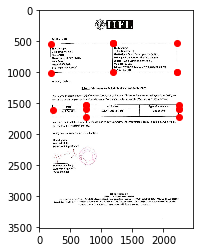

In [37]:
camelot.plot(tables[0], kind='joint').show()

In [38]:
tables[0].df

,0,1
0,"To,The Manager,Listing Department,BSE leitecl,...","To,The Manager,Llstlng Department,The Natlonal..."
1,,
2,,


In [39]:
tables[1].df.rename(columns=tables[1].df.iloc[0])
tables[1].df.drop(tables[1].df.index[0])
tables[1].df

,0,1
0,Date,ParticularsType of Interactlon
1,"April 06, 2018",SBICAP Securities LtdOne on One
2,,
3,,


In [40]:
insert_into_db(tables)

------------------------------------------------
{'_id': ObjectId('5fe2260a77d952fc4defb19c'), '0': 'Day & Date', '1': 'Name of Organisation', '2': 'Type of Meeting'}
{'_id': ObjectId('5fe2260a77d952fc4defb19d'), '0': 'Friday.April 06, 2018', '1': 'HDFC Securities Limited', '2': 'One-on-one Call'}
{'_id': ObjectId('5fe226342c5238d1d1dcc47b'), '0': 'Day & Date', '1': 'Name of Organisation', '2': 'Type of Meeting'}
{'_id': ObjectId('5fe226342c5238d1d1dcc47c'), '0': 'Friday.April 06, 2018', '1': 'HDFC Securities Limited', '2': 'One-on-one Call'}
{'_id': ObjectId('5fe2268a7554c8bf3f57f081'), '0': 'Day & Date', '1': 'Name of Organisation', '2': 'Type of Meeting'}
{'_id': ObjectId('5fe2268a7554c8bf3f57f082'), '0': 'Friday.April 06, 2018', '1': 'HDFC Securities Limited', '2': 'One-on-one Call'}
{'_id': ObjectId('5fe227609731891218ac26b2'), '0': 'To,The Manager,Listing Department,BSE leitecl,Phiroze Jeeleebhoy Tower,Dalal Street,Mumbai 400 001.BSE Scrip Code: 532636', '1': 'To,The Manager,Llst

# ---------------------------------------------------------


# PSP.pdf

In [41]:
tables=camelot.read_pdf("./Rec_Task/psp.pdf",line_scale=20,shift_text=[''],strip_text='\n')

In [42]:
# number of tables extracted
print("Total tables extracted:", tables.n)

Total tables extracted: 1


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


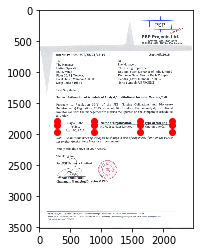

In [43]:
camelot.plot(tables[0], kind='joint').show()

In [44]:
tables[0].df

,0,1,2
0,Day & Date,Name of Organisation,Type of Meeting
1,"Friday.April 06, 2018",HDFC Securities Limited,One-on-one Call


In [45]:
insert_into_db(tables)

------------------------------------------------
{'_id': ObjectId('5fe227639731891218ac26b9'), '0': 'Day & Date', '1': 'Name of Organisation', '2': 'Type of Meeting'}
{'_id': ObjectId('5fe227639731891218ac26ba'), '0': 'Friday.April 06, 2018', '1': 'HDFC Securities Limited', '2': 'One-on-one Call'}


# ---------------------------------------------------------


# jm.pdf

In [46]:
tables=camelot.read_pdf("./Rec_Task/jm.pdf",line_scale=20,shift_text=[''],strip_text='\n',split_text=True)

In [47]:
# number of tables extracted
print("Total tables extracted:", tables.n)

Total tables extracted: 1


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


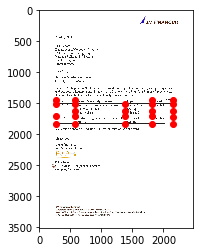

In [48]:
camelot.plot(tables[0], kind='joint').show()

In [49]:
tables[0].df

,0,1,2,3
0,Date,Name of the analyst/investor,Type,Location
1,"April 4, 2018",Motilal Oswal Asset Management Company Limited,One-on-One meeting,Mumbai
2,,Credit Suisse I,Voice call,-
3,"April 5, 2018",Maybank Eng Securities India Private Limited,One-on-One meeting,Mumbai


In [50]:
insert_into_db(tables)

------------------------------------------------
{'_id': ObjectId('5fe227659731891218ac26bb'), '0': 'Date', '1': 'Name of the analyst/investor', '2': 'Type', '3': 'Location'}
{'_id': ObjectId('5fe227659731891218ac26bc'), '0': 'April 4, 2018', '1': 'Motilal Oswal Asset Management Company Limited', '2': 'One-on-One meeting', '3': 'Mumbai'}
{'_id': ObjectId('5fe227659731891218ac26bd'), '0': '', '1': 'Credit Suisse I', '2': 'Voice call', '3': '-'}
{'_id': ObjectId('5fe227659731891218ac26be'), '0': 'April 5, 2018', '1': 'Maybank Eng Securities India Private Limited', '2': 'One-on-One meeting', '3': 'Mumbai'}


# ---------------------------------------------------------
